In [63]:
#downloading the nessesscary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [65]:
#Looking at the first view rows of the data to better understand the dataset
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [66]:
#This is done to better understand the data, see what kind of functions will work on certain columns
df.info()

#univariate analysis of original dataset 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [67]:
# Convert date columns to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'], errors='coerce')

In [68]:
# Create a new column for subscription duration
df['Subscription_Duration_Days'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']).dt.days

In [69]:
df['Date_of_Churn'].max()

Timestamp('2025-02-09 01:53:37.661719')

In [70]:
# For non-churned users, calculate the duration till the current date
current_date = pd.to_datetime("2024-05-28")
df['Subscription_Duration_Days'].fillna((df['Date_of_Churn'].max() - df['Subscription_Start_Date']).dt.days, inplace=True)

/var/folders/g9/nsrxf98x7b3b8m4gk4095qn80000gn/T/ipykernel_15761/3912733821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subscription_Duration_Days'].fillna((df['Date_of_Churn'].max() - df['Subscription_Start_Date']).dt.days, inplace=True)


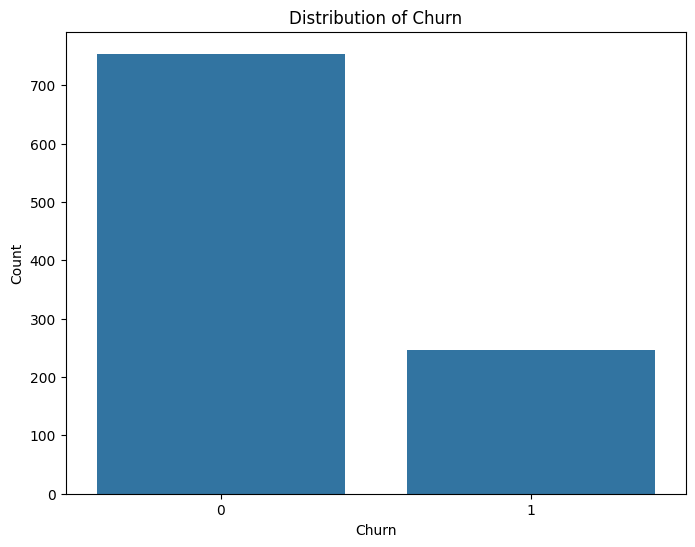

In [71]:
# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [72]:
# Creating a new DataFrame with only churned data
churned_df = df[df['Churned'] == True]
#univariate analysis of churned data set, this was compared to the univariate analysis of the entire dataset
churned_df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Subscription_Duration_Days
count,246.000000,246.000000,246,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246,246.000000
mean,505.361789,43.174797,2021-08-17 06:52:09.857642752,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0,2022-02-28 15:27:17.174715904,195.357724
min,13.000000,18.000000,2019-05-13 01:53:37.658474,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0,2019-08-11 01:53:37.658920,30.000000
25%,273.250000,30.000000,2020-04-22 07:53:37.663491072,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0,2020-11-15 07:53:37.659917824,115.000000
50%,501.500000,41.000000,2021-05-01 01:53:37.660559104,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0,2021-11-20 01:53:37.661230336,201.000000
75%,752.250000,56.000000,2022-11-26 19:53:37.664207360,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0,2023-06-05 01:53:37.660055808,276.750000
max,999.000000,70.000000,2024-04-30 01:53:37.659297,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0,2025-02-09 01:53:37.661719,364.000000
std,284.676765,15.507139,NaN,3.494289,17.236483,1.841691,30.536877,1.273513,0.0,NaN,95.483742


In [73]:
#Creating a new DataFrame with only standard churned data, to see insights specfifc to the standard tier
standard_churned_df = churned_df[churned_df['Subscription_Type'] == 'Standard']

#univariate analysis of churned data set, this was compared to the univariate analysis of the entire dataset and all churned users
standard_churned_df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Subscription_Duration_Days
count,124.000000,124.000000,124,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.0,124,124.000000
mean,484.766129,43.725806,2021-08-18 22:01:22.178425344,1.499000e+01,17.807738,1.887168,1055.153226,2.612903,1.0,2022-03-04 15:14:55.081651200,197.717742
min,13.000000,18.000000,2019-05-13 01:53:37.658474,1.499000e+01,0.041574,0.004700,1000.000000,1.000000,1.0,2019-08-11 01:53:37.658920,30.000000
25%,275.750000,29.000000,2020-07-19 19:53:37.661841152,1.499000e+01,6.144872,0.642957,1027.750000,2.000000,1.0,2021-01-20 13:53:37.663518464,120.000000
50%,488.500000,42.500000,2021-04-30 01:53:37.663101440,1.499000e+01,13.308785,1.240162,1059.500000,2.000000,1.0,2021-12-03 13:53:37.661254912,201.000000
75%,705.750000,59.000000,2022-10-07 13:53:37.662402816,1.499000e+01,27.533941,2.631877,1085.000000,4.000000,1.0,2023-05-23 13:53:37.660944640,276.000000
max,999.000000,70.000000,2024-04-15 01:53:37.661719,1.499000e+01,72.086136,11.417557,1099.000000,5.000000,1.0,2025-02-09 01:53:37.661719,363.000000
std,272.357910,16.238236,NaN,3.567126e-15,15.344385,1.861110,31.033956,1.286008,0.0,NaN,92.615523


In [74]:
# Analyzing if age plays a factor in churn
# Categorize users into age groups to see if there is a pattern

# Define age groups with 15-year ranges, after 30
df.loc[df['Age'] <= 18, 'Age_Group'] = '0-18'
df.loc[df['Age'].between(18, 30), 'Age_Group'] = '18-30'
df.loc[df['Age'].between(31, 45), 'Age_Group'] = '31-45'
df.loc[df['Age'].between(46, 60), 'Age_Group'] = '46-60'
df.loc[df['Age'].between(61, 75), 'Age_Group'] = '61-75'
df.loc[df['Age'] > 75, 'Age_Group'] = '76+'


In [75]:
# Age distrubtion percentage by subscribers
age_churn = df.groupby(['Churned','Age_Group']).size().unstack(fill_value=0)
age_churn_percentage = age_churn .div(age_churn .sum(axis=1), axis=0) * 100
print(age_churn_percentage)

Age_Group      18-30      31-45      46-60      61-75
Churned                                              
0          22.679045  27.320955  30.238727  19.761273
1          26.016260  32.520325  21.138211  20.325203


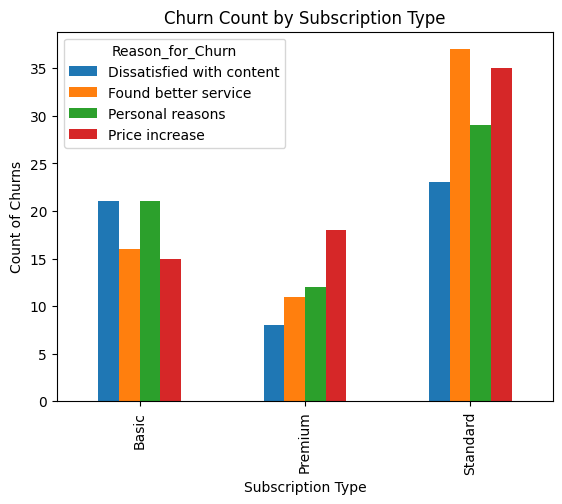

In [76]:
# Grouping by 'Reason_for_Churn' and 'Subscription_Type' to determine the main reasons for churning in each subscription tier

churned_df.groupby(['Reason_for_Churn','Subscription_Type'])['Churned'].count()

# Creating a bar chart to visualize the most reasons for churning, categorized by subscription type
churned_df = (df[df['Churned'] == 1])
churn_counts = churned_df.groupby(['Subscription_Type', 'Reason_for_Churn']).size().unstack(fill_value=0)

churn_counts.plot(kind='bar')
plt.title('Churn Count by Subscription Type')   
plt.xlabel('Subscription Type')
plt.ylabel('Count of Churns')
plt.show()

In [77]:
# Reason for churning distrubtion percentage by subscribers
reason_churn = churned_df.groupby(['Reason_for_Churn','Subscription_Type']).size().unstack(fill_value=0)
reason_churn_percentage = reason_churn.div(reason_churn.sum(axis=1), axis=0) * 100
print(reason_churn_percentage)

Subscription_Type              Basic    Premium   Standard
Reason_for_Churn                                          
Dissatisfied with content  40.384615  15.384615  44.230769
Found better service       25.000000  17.187500  57.812500
Personal reasons           33.870968  19.354839  46.774194
Price increase             22.058824  26.470588  51.470588


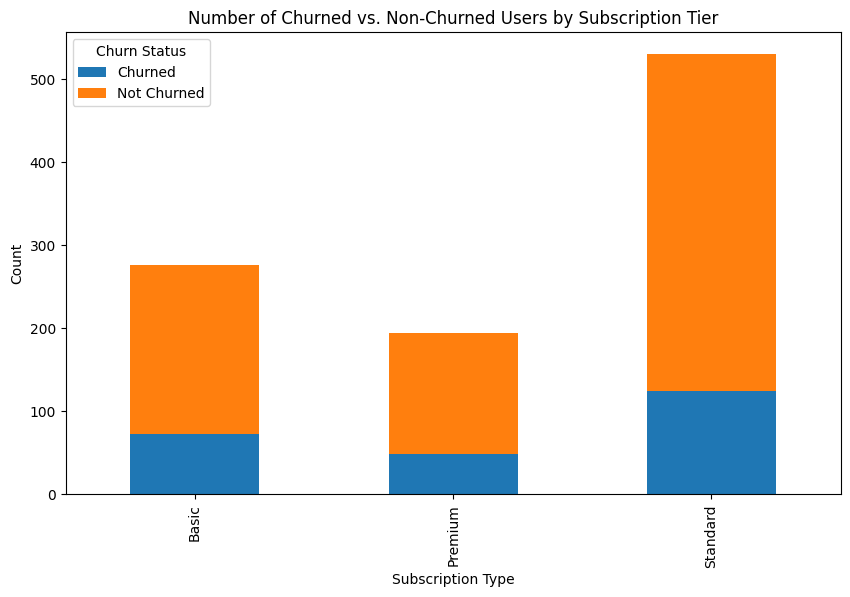

In [78]:
# Create a new column to label churned and not churned users
df['Churn_Status'] = df['Churned'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')

# Group by Subscription_Type and Churn_Status to get counts
subscription_churn_counts = df.groupby(['Subscription_Type', 'Churn_Status']).size().unstack().fillna(0)

# Plot the stacked bar chart
subscription_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Set plot title and labels
plt.title('Number of Churned vs. Non-Churned Users by Subscription Tier')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.show()

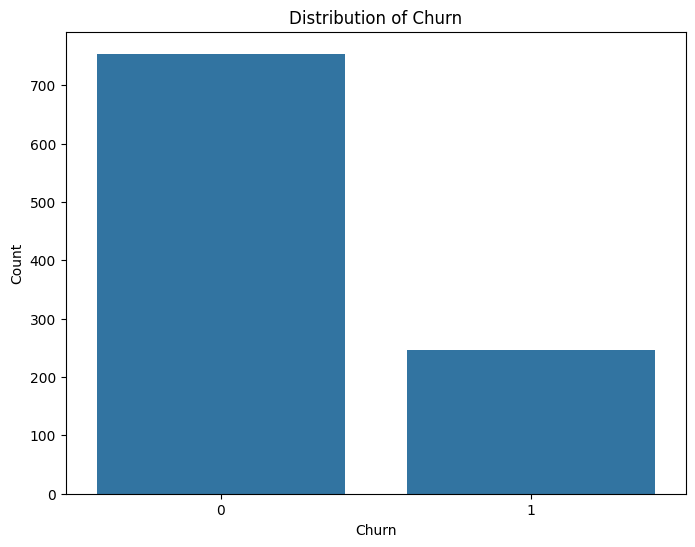

In [79]:
# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Devices_Used  Subscription_Type
Mobile        Basic                35
              Premium              24
              Standard             72
PC            Basic                 9
              Premium               6
              Standard             12
TV            Basic                15
              Premium               9
              Standard             20
Tablet        Basic                14
              Premium              10
              Standard             20
Name: Churned, dtype: int64


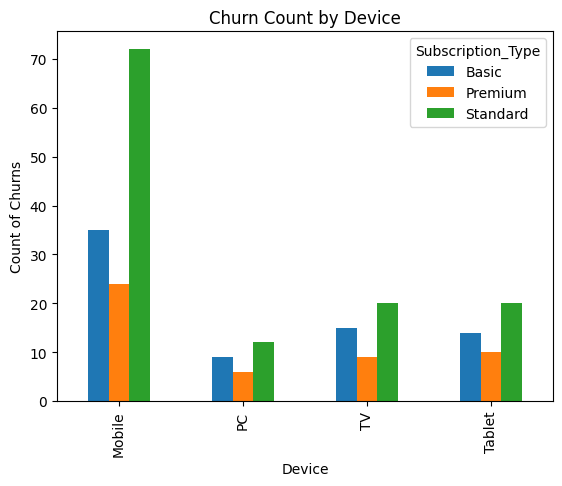

In [80]:
# Exploring the impact of devices on churn rate
churned_df.groupby(['Devices_Used','Subscription_Type'])['Churned'].count()
print(churned_df.groupby(['Devices_Used','Subscription_Type'])['Churned'].count())

# Creating a bar chart to visualize the most popular devices used to access the platform, categorized by subscription type
device_counts = churned_df.groupby(['Devices_Used','Subscription_Type']).size().unstack(fill_value=0)

device_counts.plot(kind='bar')
plt.title('Churn Count by Device')   
plt.xlabel('Device')
plt.ylabel('Count of Churns')
plt.show()

Devices_Used
Mobile    58.064516
PC         9.677419
TV        16.129032
Tablet    16.129032
Name: Churned, dtype: float64


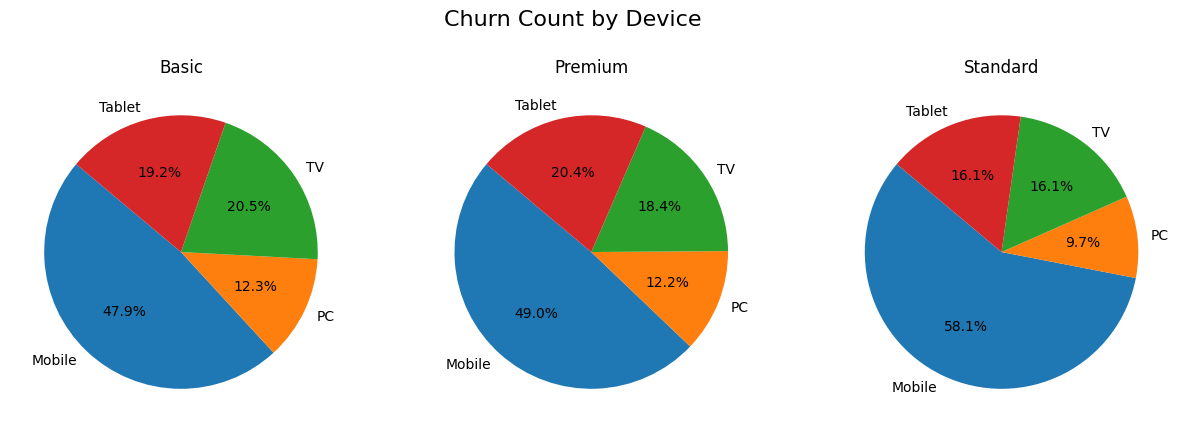

In [81]:
#Seeing the percentage breakdown of the devices Standard user access the platform with
# Group by 'Device' and count the number of occurrences for standard users
device_counts = standard_churned_df.groupby('Devices_Used')['Churned'].count()

# Calculate the percentage
total_churned = standard_churned_df['Churned'].count()
device_percentage = (device_counts / total_churned) * 100

# Display the percentage
print(device_percentage)

# Creating a pie chart to visualize the distribution of churn counts by device for each subscription type
device_counts = churned_df.groupby(['Devices_Used', 'Subscription_Type']).size().unstack(fill_value=0)

# Plotting pie charts for each subscription type
fig, axs = plt.subplots(1, len(device_counts.columns), figsize=(15, 5))
fig.suptitle('Churn Count by Device', fontsize=16)

for i, (subscription_type, counts) in enumerate(device_counts.items()):
    ax = axs[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(subscription_type)

plt.show()

Devices_Used
Mobile    40.8
PC        17.4
TV        20.1
Tablet    21.7
Name: Churned, dtype: float64


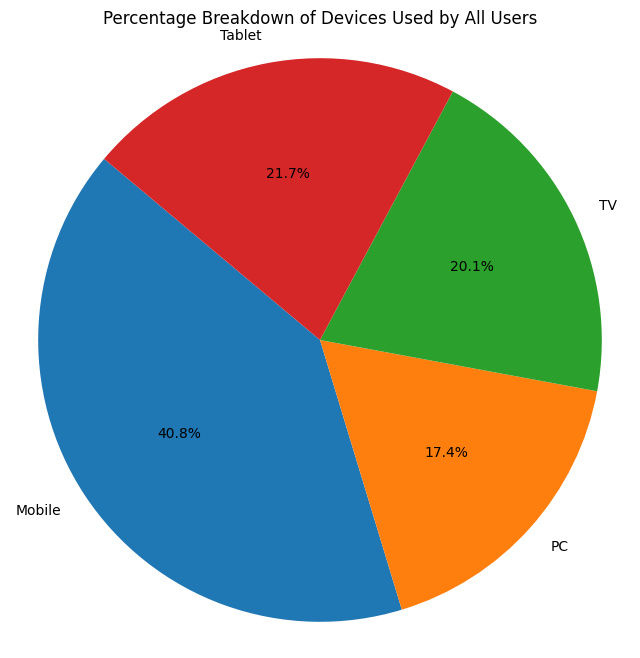

In [82]:
#Seeing the percentage breakdown of the devices all users access the platform with
# Group by 'Device' and count the number of occurrences for all users
device_counts_df = df.groupby('Devices_Used')['Churned'].count()

# Calculate the percentage
total_churned_df = df['Churned'].count()
device_percentage_df = (device_counts_df / total_churned_df) * 100

# Display the percentage
print(device_percentage_df)


# Pie Chart for a visual represenation of the percentages
labels = device_percentage_df.index
sizes = device_percentage_df.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Breakdown of Devices Used by All Users')
plt.show()


In [83]:
# Checking the relationship between subscription length and churn rate

# Convert 'Subscription_Start_Date' and 'Date_of_Churn' columns to datetime type
churned_df.loc[:, 'Subscription_Start_Date'] = pd.to_datetime(churned_df['Subscription_Start_Date'])
churned_df.loc[:, 'Date_of_Churn'] = pd.to_datetime(churned_df['Date_of_Churn'])

# Calculate the length of the subscription in days and add it as a new column
churned_df.loc[:, 'Subscription_Length'] = (churned_df['Date_of_Churn'] - churned_df['Subscription_Start_Date']).dt.days

# Calculate and display the average subscription length
average_subscription_length = churned_df['Subscription_Length'].mean()
average_subscription_length


/var/folders/g9/nsrxf98x7b3b8m4gk4095qn80000gn/T/ipykernel_15761/895812770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df.loc[:, 'Subscription_Length'] = (churned_df['Date_of_Churn'] - churned_df['Subscription_Start_Date']).dt.days


195.35772357723576

In [84]:
churned_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration_Days,Age_Group,Subscription_Length
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service,52.0,31-45,52
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service,133.0,61-75,133
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase,270.0,46-60,270
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service,233.0,31-45,233
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase,282.0,31-45,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,26,Male,Central,2021-10-06 01:53:37.667748,Basic,9.99,Direct Debit,5.586560,Sci-Fi,PC,3.773253,1025,5,1,2022-05-30 01:53:37.667748,Found better service,236.0,18-30,236
991,992,34,Female,Central,2019-10-04 01:53:37.667839,Standard,14.99,PayPal,13.864300,Drama,PC,0.500756,1003,3,1,2019-11-09 01:53:37.667839,Personal reasons,36.0,31-45,36
992,993,43,Female,East,2021-01-26 01:53:37.667850,Premium,19.99,Credit Card,2.735002,Action,Mobile,0.070838,1099,1,1,2021-10-24 01:53:37.667850,Personal reasons,271.0,31-45,271
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139.0,18-30,139


In [86]:
# Calculate the total number of churned users for "All Tiers"
total_churned_all_tiers = churned_df.groupby('Age_Group').size()

# Calculate the total number of churned users for "Standard Tier" only
total_churned_standard = churned_df[churned_df['Subscription_Type'] == 'Standard'].groupby('Age_Group').size()

# Calculate the percentage of churned users for "All Tiers"
percentage_all_tiers = (total_churned_all_tiers / total_churned_all_tiers.sum()) * 100

# Calculate the percentage of churned users for "Standard Tier"
percentage_standard_tier = (total_churned_standard / total_churned_standard.sum()) * 100

# Combine the two percentage series into a single DataFrame
churn_percentage_df = pd.DataFrame({
    'All Tiers (%)': percentage_all_tiers,
    'Standard Tier (%)': percentage_standard_tier
}).fillna(0)  # Fill NaN with 0 where there are no churned users in "Standard Tier"

# Display the combined DataFrame
print(churn_percentage_df)

           All Tiers (%)  Standard Tier (%)
Age_Group                                  
18-30          26.016260          26.612903
31-45          32.520325          26.612903
46-60          21.138211          25.000000
61-75          20.325203          21.774194


In [87]:
# Checking the relationship between subscription length and standard churn rate

# Convert 'Subscription_Start_Date' and 'Date_of_Churn' columns to datetime type
standard_churned_df.loc[:, 'Subscription_Start_Date'] = pd.to_datetime(standard_churned_df['Subscription_Start_Date'])
standard_churned_df.loc[:, 'Date_of_Churn'] = pd.to_datetime(standard_churned_df['Date_of_Churn'])

# Calculate and display the average subscription length
standard_churned_df.loc[:, 'Subscription_Length'] = (standard_churned_df['Date_of_Churn'] - standard_churned_df['Subscription_Start_Date']).dt.days
standard_churned_df['Subscription_Length'].mean()


197.71774193548387

In [88]:
# Calculate the total count of users grouped by 'Payment_Method' and 'Subscription_Type'
total_users = df.groupby(['Payment_Method', 'Subscription_Type'])['Churned'].count()

# Calculate the total count of churned users grouped by 'Payment_Method' and 'Subscription_Type'
churned_users = churned_df.groupby(['Payment_Method', 'Subscription_Type'])['Churned'].count()

# Calculate the percentage of users in each group for the whole dataset
total_users_percentage = (total_users / total_users.sum()) * 100

# Calculate the percentage of churned users in each group
churned_users_percentage = (churned_users / churned_users.sum()) * 100

# Combine both total users percentage and churned users percentage into one DataFrame
comparison_df = pd.DataFrame({
    'All Users (%)': total_users_percentage,
    'Churned Users (%)': churned_users_percentage
}).fillna(0)  # Fill NaN with 0 where necessary

# Display the comparison table
print(comparison_df)

                                  All Users (%)  Churned Users (%)
Payment_Method Subscription_Type                                  
Credit Card    Basic                       17.0          17.479675
               Premium                     11.7          12.601626
               Standard                    32.6          30.487805
Direct Debit   Basic                        5.3           5.691057
               Premium                      4.1           3.658537
               Standard                    10.0          10.569106
PayPal         Basic                        5.3           6.504065
               Premium                      3.6           3.658537
               Standard                    10.4           9.349593


In [89]:
# Calculate the total count of users grouped by 'Location'
total_users = df.groupby(['Location'])['Churned'].count()

# Calculate the total count of churned users grouped by 'Location'
churned_users = churned_df.groupby(['Location'])['Churned'].count()

# Calculate the percentage of users in each category for the whole dataset
total_users_percentage = (total_users / total_users.sum()) * 100

# Calculate the percentage of users in each category for the churned users
churned_users_percentage = (churned_users / churned_users.sum()) * 100

# Combine both total users percentage and churned users percentage into one DataFrame
comparison_df = pd.DataFrame({
    'All Users (%)': total_users_percentage,
    'Churned Users (%)': churned_users_percentage
}).fillna(0)  # Fill NaN with 0 where necessary

# Display the comparison table
print(comparison_df)

          All Users (%)  Churned Users (%)
Location                                  
Central            20.1          19.105691
East               20.0          24.390244
North              20.4          21.544715
South              17.9          17.073171
West               21.6          17.886179


In [90]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration_Days,Age_Group,Churn_Status
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,1708.0,46-60,Not Churned
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,354.0,61-75,Not Churned
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,857.0,46-60,Not Churned
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,1132.0,31-45,Not Churned
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,1794.0,46-60,Not Churned


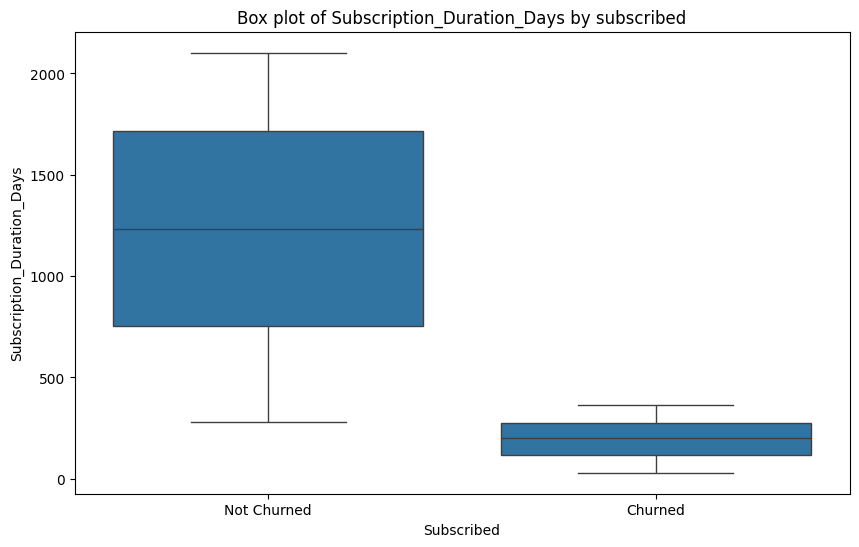

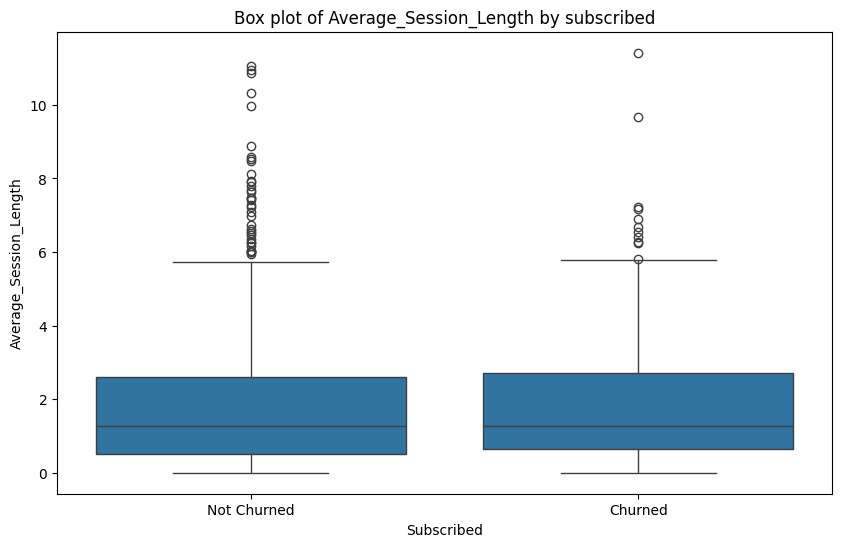

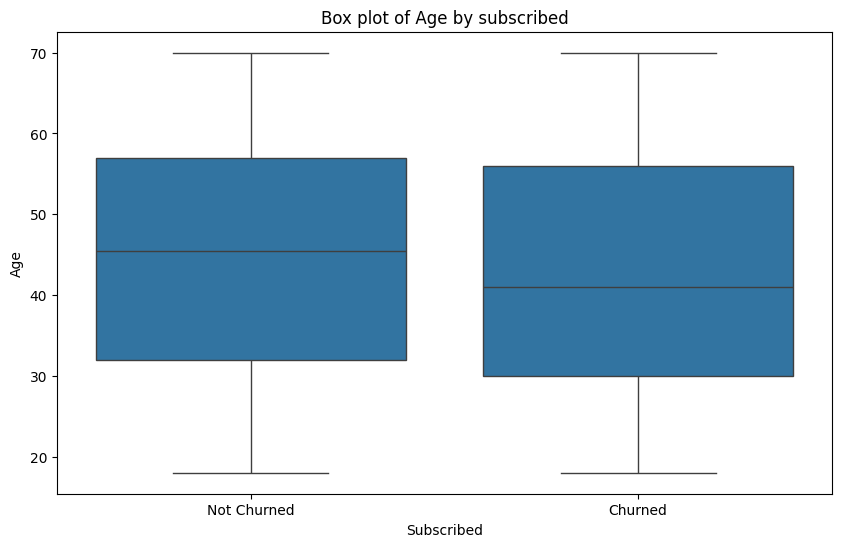

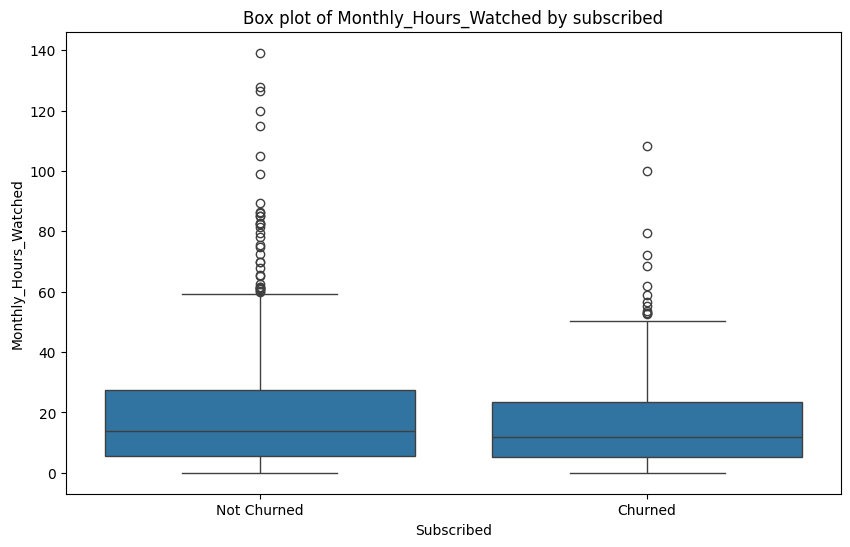

In [103]:
# Box plot for each numerical feature, to see the differnece between the churned and nonchurned users
# This helps to better see differences in behavior across Subscribers and Non Subscirbers categories
numerical_features = ['Subscription_Duration_Days','Average_Session_Length','Age', 'Monthly_Hours_Watched']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn_Status', y=feature, data=df)
    plt.title(f'Box plot of {feature} by subscribed')
    plt.xlabel('Subscribed')
    plt.show()

In [92]:
#Investigating the most popular genre of all users
df.groupby(['Favorite_Genre','Subscription_Type'])['Churned'].count()


Favorite_Genre  Subscription_Type
Action          Basic                 50
                Premium               44
                Standard             111
Comedy          Basic                 44
                Premium               37
                Standard             122
Documentary     Basic                 54
                Premium               33
                Standard             101
Drama           Basic                 67
                Premium               41
                Standard             104
Sci-Fi          Basic                 61
                Premium               39
                Standard              92
Name: Churned, dtype: int64

In [93]:
#Seeing what the favourite genre type is of those who are disstatsifed by the content

#Made a list of users that dissatisfed with the content
dissatisfied_df = df[df['Reason_for_Churn'] == 'Dissatisfied with content']

dissatisfied_df.groupby(['Favorite_Genre','Subscription_Type'])['Churned'].count()

Favorite_Genre  Subscription_Type
Action          Basic                3
                Premium              1
                Standard             8
Comedy          Basic                3
                Premium              3
                Standard             5
Documentary     Basic                3
                Standard             2
Drama           Basic                3
                Premium              2
                Standard             6
Sci-Fi          Basic                9
                Premium              2
                Standard             2
Name: Churned, dtype: int64

In [94]:
#Calculating turn rate of standard users: 
# Filter for standard users
standard_users = df[df['Subscription_Type'] == 'Standard']

# Count churned users
churned_users = standard_users[standard_users['Churned'] == True]
number_of_churned_users = churned_users.shape[0]

# Total number of standard users
total_standard_users = standard_users.shape[0]

# Calculate churn rate
churn_rate = (number_of_churned_users / total_standard_users) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 23.40%


In [97]:
#Calucating the reveune recovered if the churn rate of standard users was reduced by to 15% 
revenue_recovered_per_month = number_of_churned_users * 0.15*14.99
print(revenue_recovered_per_month)

revenue_recovered_per_year = revenue_recovered_per_month * 12
print(revenue_recovered_per_year)

278.81399999999996
3345.7679999999996


In [98]:
# Define parameters
monthly_subscription_cost = 14.99
proposed_annual_plan_cost = 160
months_in_year = 12
total_users = 530
churned_users = 124

# Calculate current churn rate
current_churn_rate = churned_users / total_users
proposed_churn_rate = 15 / 100

# Convert annual churn rate to monthly
current_monthly_churn_rate = current_churn_rate / 12
proposed_monthly_churn_rate = proposed_churn_rate / 12

# Calculate current revenue
user_base_current = total_users
revenue_current = 0
for month in range(months_in_year):
    revenue_current += user_base_current * monthly_subscription_cost
    user_base_current -= user_base_current * current_monthly_churn_rate

# Calculate proposed revenue
user_base_proposed = total_users
revenue_proposed = 0
annual_plan_users = int(user_base_proposed * 0.3)  # Assume 30% of users opt for the annual plan
monthly_plan_users = user_base_proposed - annual_plan_users

# Annual revenue from users opting for annual plan
revenue_proposed += annual_plan_users * proposed_annual_plan_cost

# Monthly revenue from remaining users
for month in range(months_in_year):
    revenue_proposed += monthly_plan_users * monthly_subscription_cost
    monthly_plan_users -= monthly_plan_users * proposed_monthly_churn_rate

# Calculate revenue difference
revenue_difference = revenue_proposed - revenue_current

print(f"Current Revenue: ${revenue_current:.2f}")
print(f"Proposed Revenue: ${revenue_proposed:.2f}")
print(f"Revenue Difference: ${revenue_difference:.2f}")


Current Revenue: $85749.36
Proposed Revenue: $87773.31
Revenue Difference: $2023.95


In [99]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration_Days,Age_Group,Churn_Status
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,1708.0,46-60,Not Churned
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,354.0,61-75,Not Churned
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,857.0,46-60,Not Churned
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,1132.0,31-45,Not Churned
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,1794.0,46-60,Not Churned
